In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Reading The Data

In [2]:
sales_data = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

In [3]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

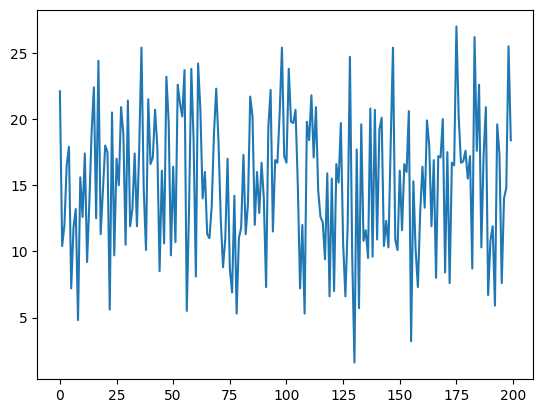

In [26]:
sales_data["Sales"].plot()

In [ ]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

# Split the data into training and testing sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


# Visualizing The Data

In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=X_test['TV'],
    y=X_test['Radio'],
    z=X_test['Newspaper'],
    mode='markers',
    marker=dict(size=8, color=y_test, colorscale='Viridis', opacity=0.8),
    text=y_test
))

fig.update_layout(scene=dict(xaxis_title='TV', yaxis_title='Radio', zaxis_title='Sales'),
                  title='3D Scatter Plot of TV, Radio, Newspaper and Sales')
fig.show()

# Make predictions on the test set


In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


### This scatter plot will help you visualize how well your model is predicting sales. 

In [11]:
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Sales', 'y': 'Predicted Sales'},
                 title='Actual vs Predicted Sales')
fig.show()
